In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

array([-1.26257749e-07,  3.06420011e-01,  8.80135475e+01, -3.35601736e+04])

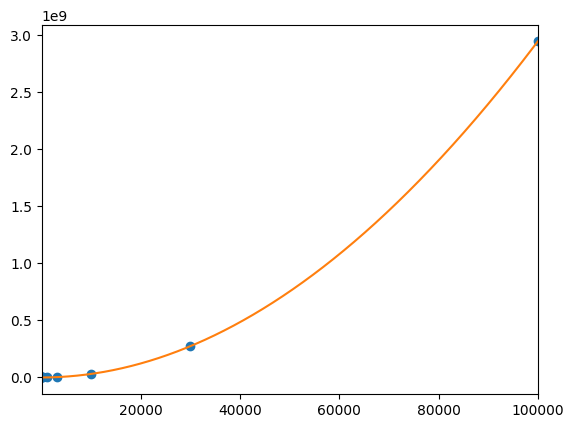

In [21]:
sort_file = open("Int_Insertion sort.txt", 'r')
points_python = []

for line in sort_file:
    array = line.split()
    if (array[1] != ">5s"):
        points_python.append([int(array[0][2:]), int(array[1])])

points = np.array(points_python)
x = points[:, 0]
y = points[:, 1]

z = np.polyfit(x, y, 3)

display(z)
f = np.poly1d(z)

x_new = np.linspace(x[0], x[-1], 10000)
y_new = f(x_new)

plt.plot(x, y, 'o', x_new, y_new)
plt.xlim([x[0] - 1, x[-1] + 1])
plt.show()

In [26]:
sort_file = open("Int_Skip list sort.txt", 'r')
points_python = []

for line in sort_file:
    array = line.split()
    if (array[1] != ">5s"):
        points_python.append([int(array[0][2:]), int(array[1])])

points = np.array(points_python)
x = points[:, 0]
y = points[:, 1]

print("| N | Time taken|")
print("| -- | -- |")

for point in points:
    time = point[1]
    if (time < 1000):
        time = str(time) + "ns"
    elif time < 1_000_000:
        time = str(round(time / 1000, 2)) + "mcs"
    elif time < 1_000_000_000:
        time = str(round(time / 10 ** 6, 2)) + "ms"
    else:
        time = str(round(time / 10 ** 9, 2)) + "s"
    print(f"| {point[0]} | {time} |")


| N | Time taken|
| -- | -- |
| 10 | 46.8mcs |
| 30 | 108.7mcs |
| 100 | 318.5mcs |
| 300 | 1.01ms |
| 1000 | 3.6ms |
| 3000 | 10.95ms |
| 10000 | 51.49ms |
| 30000 | 169.16ms |
| 100000 | 1.3s |
| 300000 | 2.44s |


In [25]:
def time_convert(time):
    if (time < 1000):
        time = str(time) + "ns"
    elif time < 1_000_000:
        time = str(round(time / 1000, 2)) + "mcs"
    elif time < 1_000_000_000:
        time = str(round(time / 10 ** 6, 2)) + "ms"
    else:
        time = str(round(time / 10 ** 9, 2)) + "s"
    return time

In [27]:
lengths = [10, 30, 100, 300, 1000, 3000, 10000]
strings = [1, 10, 100, 1000, 10000]

simple = open("String_Insertion sort.txt")
binary = open("String_Binary insertion sort.txt")

array1 = [[0 for j in range(len(strings))] for i in range(len(lengths))]
array2 = [[0 for j in range(len(strings))] for i in range(len(lengths))]

for lines in simple:
    line_split = lines.split()
    n = int(line_split[1])
    m = int(line_split[3][:-1])
    time = int(line_split[-1])

    array1[lengths.index(n)][strings.index(m)] = time

for lines in binary:
    line_split = lines.split()
    n = int(line_split[1])
    m = int(line_split[3][:-1])
    time = int(line_split[-1])

    array2[lengths.index(n)][strings.index(m)] = time

array3 = [[round(array2[i][j] * 1.0 / array1[i][j], 2) for j in range(len(strings))] for i in range(len(lengths))]

print("|N\ M|", end='')
for size in strings:
    print(size, end='|')

print("\n|--|", end='')
for size in strings:
    print("--|", end='')
print()

for index, line in enumerate(array2):
    print(f"|{lengths[index]}|", end='')
    for elem in line:
        print('{0: >5}|'.format(time_convert(elem)), end=' ')
    print()

|N\ M|1|10|100|1000|10000|
|--|--|--|--|--|--|
|10|1.1mcs| 1.3mcs| 6.0mcs| 7.0mcs| 55.7mcs| 
|30|5.8mcs| 5.7mcs| 20.4mcs| 24.5mcs| 141.8mcs| 
|100|41.6mcs| 40.2mcs| 89.4mcs| 98.8mcs| 663.8mcs| 
|300|330.9mcs| 285.5mcs| 356.2mcs| 366.0mcs| 1.83ms| 
|1000|3.25ms| 2.99ms| 2.05ms| 2.11ms| 6.82ms| 
|3000|27.14ms| 23.65ms| 12.65ms| 13.06ms| 25.0ms| 
|10000|297.0ms| 254.64ms| 119.74ms| 122.93ms| 147.67ms| 


array([-1.18882409e-12,  3.06547327e-01,  1.18857012e+05])

array([-6.79026373e-06,  7.27700554e+01,  1.70086528e+05])

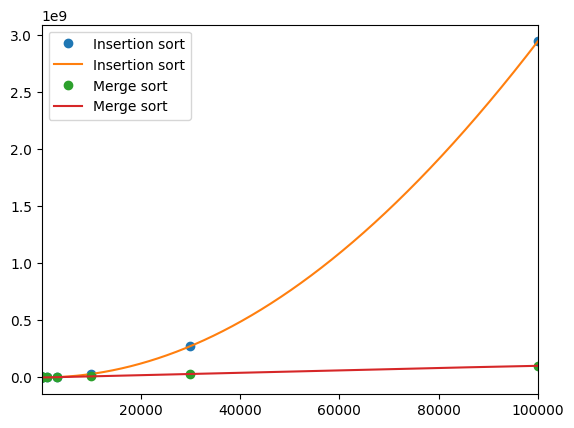

[array([[        10,        200],
        [        30,        600],
        [       100,       5100],
        [       300,      31100],
        [      1000,     360400],
        [      3000,    2820800],
        [     10000,   31432800],
        [     30000,  274968100],
        [    100000, 2946710300]]),
 array([[       10,      9000],
        [       30,     28900],
        [      100,     84600],
        [      300,    291200],
        [     1000,    935400],
        [     3000,   2936100],
        [    10000,  10090100],
        [    30000,  31121400],
        [   100000, 102315000]])]

In [16]:
def plot_and_get_info(sort_name):
    sort_file = open("Int_" + sort_name + " sort.txt", 'r')
    points_python = []

    for line in sort_file:
        array = line.split()
        if (array[1] != ">5s" and int(array[0][2:]) <= 100000):
            points_python.append([int(array[0][2:]), int(array[1])])

    points = np.array(points_python)
    x = points[:, 0]
    y = points[:, 1]

    z = np.polyfit(np.log2(x) * x, y, 2)
    if (sort_name == "Insertion"):
        z = np.polyfit(x ** 2, y, 2)

    display(z)
    f = np.poly1d(z)

    x_new = np.linspace(x[0], x[-1], 10000)
    y_new = f(x_new * np.log2(x_new))

    if (sort_name == "Insertion"):
        y_new = f(x_new ** 2)

    plt.plot(x, y, 'o', x_new, y_new, label=sort_name + " sort")
    plt.xlim([x[0] - 1, x[-1] + 1])
    return points

array = []
for sort_name in ["Insertion", "Merge"]:
    array.append(plot_and_get_info(sort_name))

plt.legend()
plt.show()
array

In [13]:
print("| N | Insertion sort | Merge sort |")
print("| -- | -- | -- |")

for line_index in range(len(array[0])):
    print(f"| {array[0][line_index][0]} |", end='')
    for sort_index in range(len(array)):
        time = array[sort_index][line_index][1]
        if (time < 1000):
            time = str(time) + "ns"
        elif time < 1_000_000:
            time = str(round(time / 1000, 2)) + "mcs"
        elif time < 1_000_000_000:
            time = str(round(time / 10 ** 6, 2)) + "ms"
        else:
            time = str(round(time / 10 ** 9, 2)) + "s"
        print(f" {time} |", end='')
    print()

| N | Insertion sort | Merge sort |
| -- | -- | -- |
| 10 | 200ns | 9.0mcs |
| 30 | 600ns | 28.9mcs |
| 100 | 5.1mcs | 84.6mcs |
| 300 | 31.1mcs | 291.2mcs |
| 1000 | 360.4mcs | 935.4mcs |
| 3000 | 2.82ms | 2.94ms |
| 10000 | 31.43ms | 10.09ms |
| 30000 | 274.97ms | 31.12ms |
| 100000 | 2.95s | 102.32ms |
